In [ ]:
# Dataset : http://cb.lk/covid_19
 
!wget http://cb.lk/covid_19

In [ ]:
!unzip covid_19

Archive:  covid_19
replace CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [ ]:
 IMAGE_SIZE = 224
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 6
BATCH_SIZE =2
TEST_SIZE = 2
learning = 0.00001
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [ ]:
pip install livelossplot

In [ ]:
import keras
from keras import layers
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import CSVLogger
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from livelossplot import PlotLossesKeras

In [ ]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
# %matplotlib inline

base_model=InceptionResNetV2(weights='imagenet',include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(lr=learning, beta_1=0.9, beta_2=0.999, amsgrad=False), loss='categorical_crossentropy',metrics=['accuracy'])

import warnings
warnings.filterwarnings("ignore")

model.summary()

219062272/219055592 [==============================] - 4s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
____________________

In [ ]:
train_datagen = image.ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = image.ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
     'CovidDataset/Train',
      target_size= (224,224),
       batch_size = 32,
        class_mode = 'categorical' 
        )

Found 224 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
    'CovidDataset/Val',
    target_size= (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 60 images belonging to 2 classes.


In [ ]:
hist = model.fit( train_generator,
                           validation_data=validation_generator,
                           epochs=EPOCHS,
                           steps_per_epoch=len(train_generator),
                           validation_steps=len(validation_generator)
                            )

Epoch 1/6
7/7 [==============================] - 260s 37s/step - loss: 0.7043 - accuracy: 0.5491 - val_loss: 0.5704 - val_accuracy: 0.7333
Epoch 2/6
7/7 [==============================] - 262s 37s/step - loss: 0.5821 - accuracy: 0.8393 - val_loss: 0.4821 - val_accuracy: 0.7167
Epoch 3/6
7/7 [==============================] - 254s 36s/step - loss: 0.5086 - accuracy: 0.8616 - val_loss: 0.4257 - val_accuracy: 0.7167
Epoch 4/6
7/7 [==============================] - 256s 37s/step - loss: 0.4140 - accuracy: 0.9420 - val_loss: 0.3247 - val_accuracy: 0.8167
Epoch 5/6
7/7 [==============================] - 257s 37s/step - loss: 0.3329 - accuracy: 0.9821 - val_loss: 0.2342 - val_accuracy: 0.9667
Epoch 6/6
7/7 [==============================] - 253s 36s/step - loss: 0.2740 - accuracy: 0.9911 - val_loss: 0.1844 - val_accuracy: 0.9833


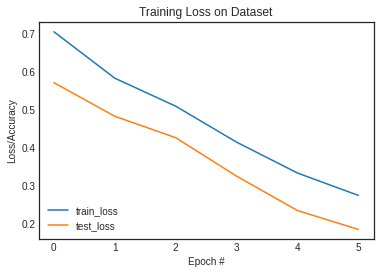

In [ ]:
N = EPOCHS
plt.style.use("seaborn-white")
plt.figure()
plt.plot(np.arange(0, N), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist.history["val_loss"], label="test_loss")
plt.title("Training Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

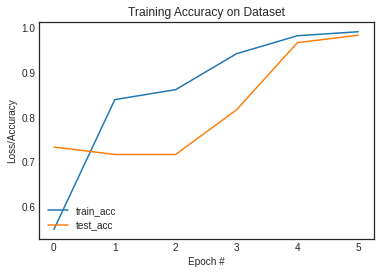

In [ ]:
plt.style.use("seaborn-white")
plt.figure()
plt.plot(np.arange(0, N), hist.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), hist.history["val_accuracy"], label="test_acc")
plt.title("Training Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


In [ ]:
LABELS = ["Covid","Normal"]

In [ ]:
def show_confusion_matrix(validations, predictions):
    matrix = confusion_matrix(validations, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix,
                cmap="coolwarm",
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

In [ ]:
validation_generator = test_datagen.flow_from_directory(
    'CovidDataset/Val',
    target_size= (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 60 images belonging to 2 classes.


In [ ]:
filenames = validation_generator.filenames
nb_samples = len(filenames)

Y_pred = model.predict_generator(validation_generator,(nb_samples//BATCH_SIZE))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
show_confusion_matrix(validation_generator.classes, y_pred)
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ["Covid","Normal"]
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))
# Plot linewidth.
lw = 2
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
   fpr[i], tpr[i], _ = roc_curve(validation_generator.classes, y_pred)
   roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
       lw=lw, label='ROC curve (area = %0.4f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

NameError: ignored